In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
filepath = 'https://raw.githubusercontent.com/chandanc5525/BootCamp_CDC/main/Machine%20Learning%20Using%20StatsModels/Bank-data.csv'
data = pd.read_csv(filepath)
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [4]:
# Create One Copy of the Dataset

df = data.copy()

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# Use Map Function to Convert y COlumns values i.e. Yes or No to 0 and 1.

df['y'] = df['y'].map({'yes':1,'no':0})

In [7]:
# Verify Changes 
df

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [8]:
df.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


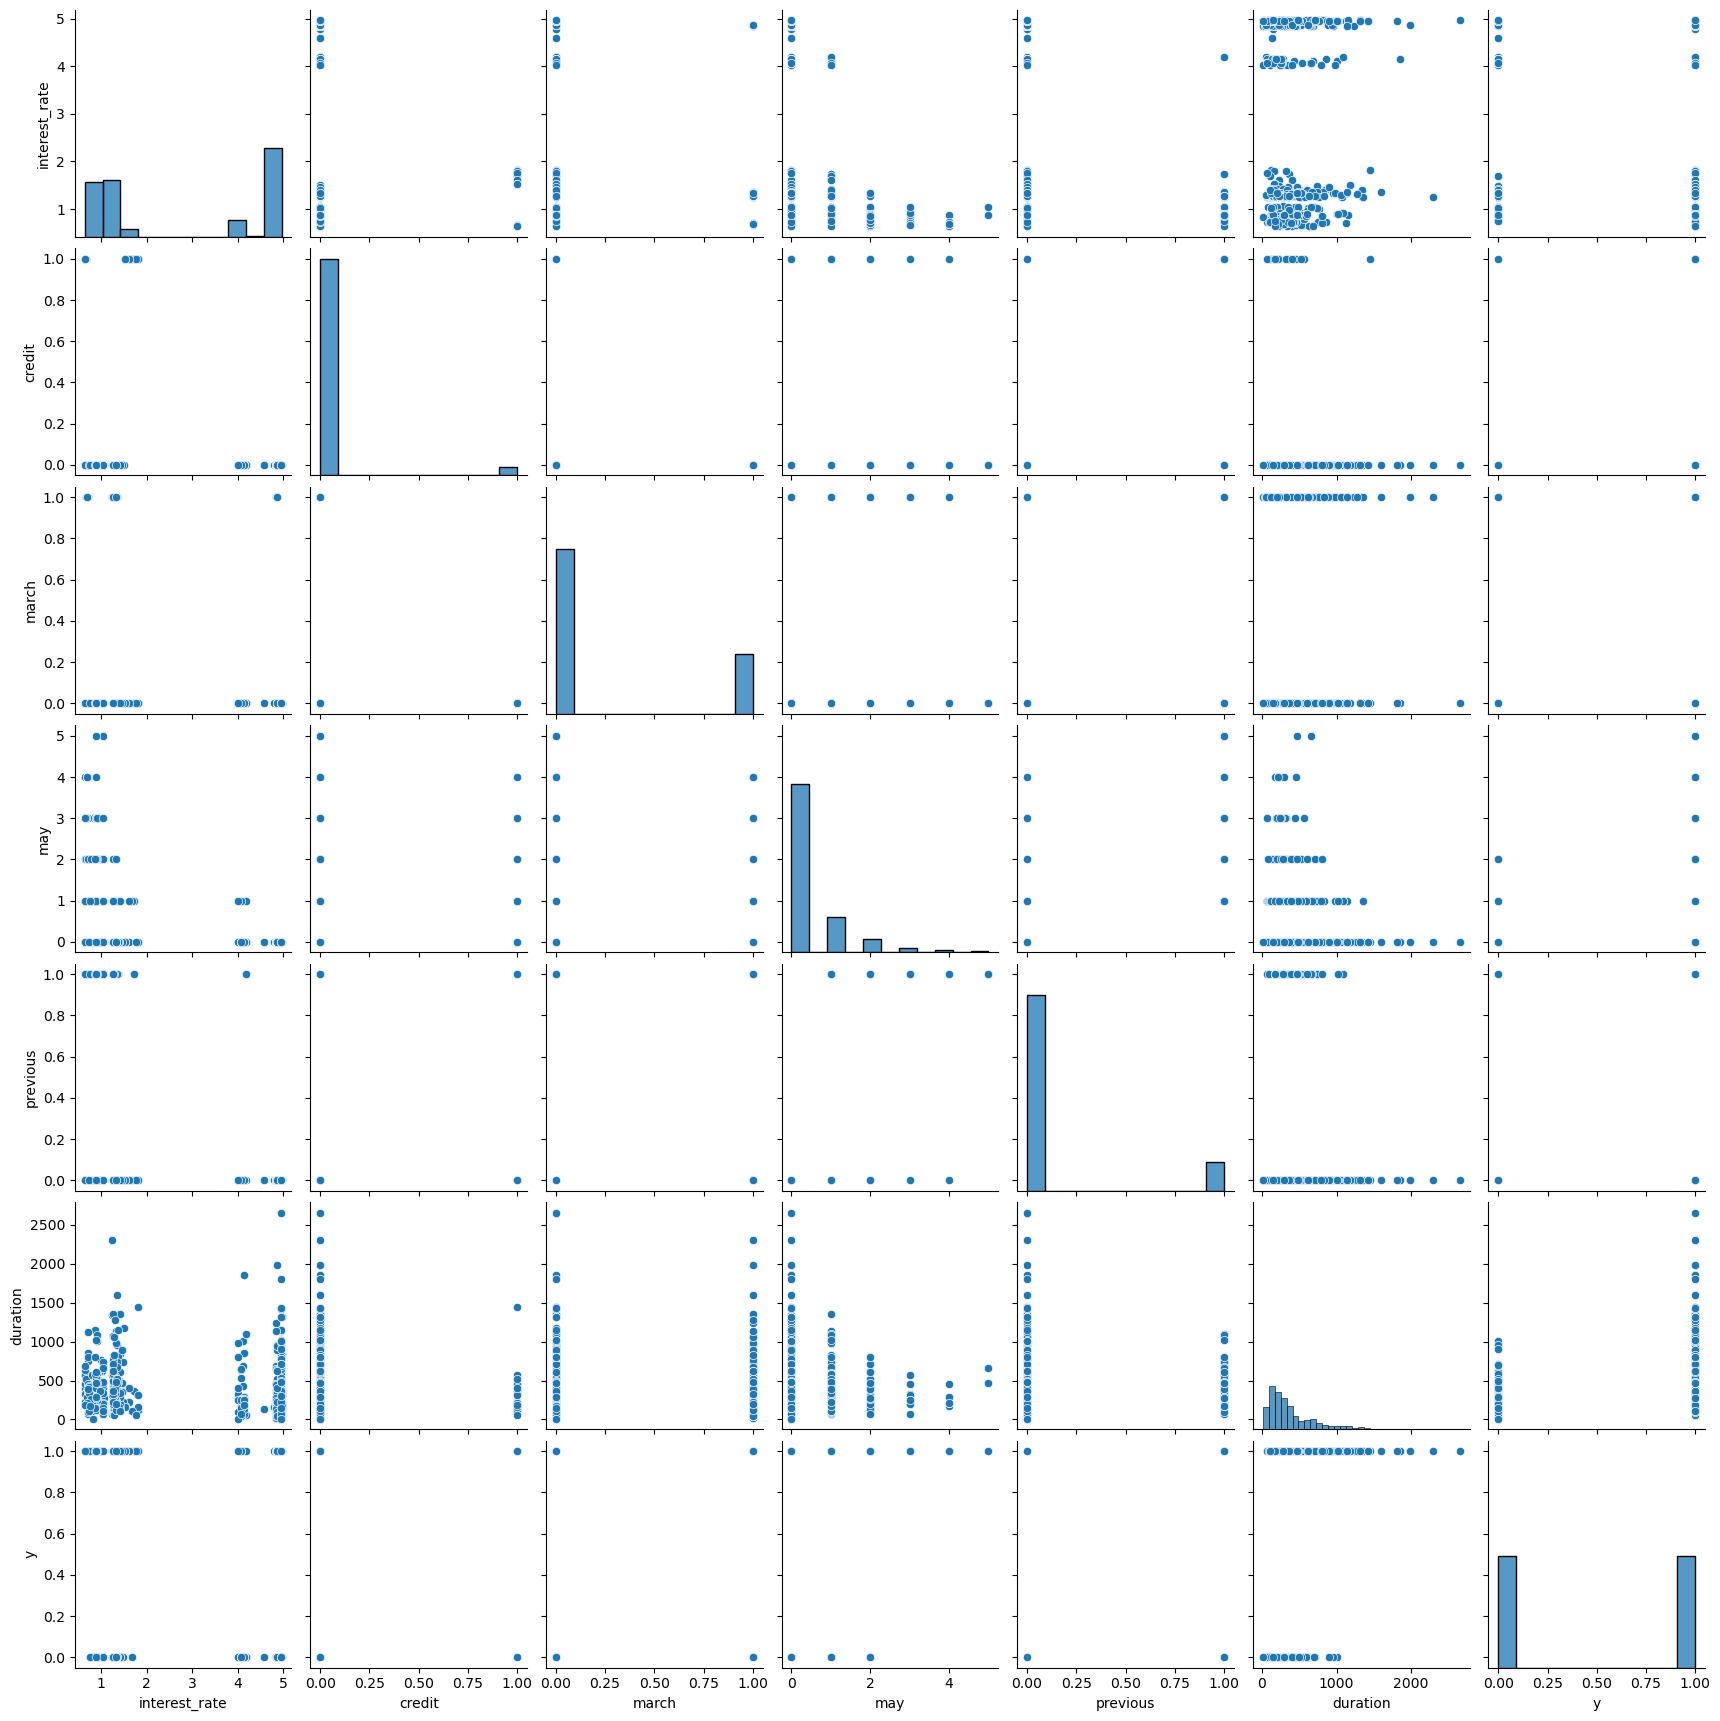

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
X = df['duration']
y = df['y']

In [11]:
X = sm.add_constant(X)

model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.2121
Time:                        04:32:18   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [13]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.212     
Dependent Variable: y                AIC:              569.7778  
Date:               2023-12-07 04:32 BIC:              578.2778  
No. Observations:   518              Log-Likelihood:   -282.89   
Df Model:           1                LL-Null:          -359.05   
Df Residuals:       516              LLR p-value:      5.3865e-35
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -1.7001    0.1918  -8.8635  0.0000  -2.0761  -1.3242
duration       0.0051    0.0006   9.1594  0.0000   0.0040   0.0062
=================================================================

"""

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


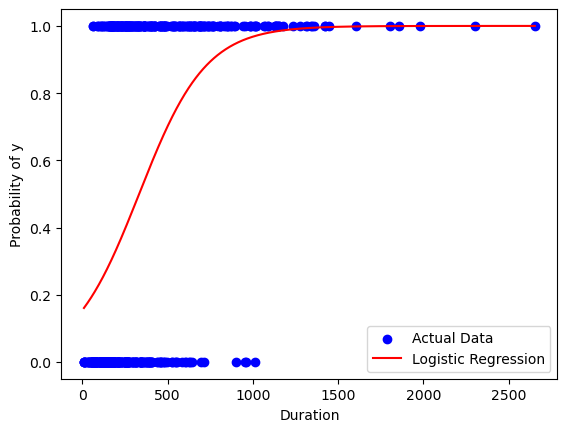

In [14]:
# Generate a range of values for 'duration'
duration_values = np.linspace(df['duration'].min(), df['duration'].max(), 1000)

# Calculate predicted probabilities using the logistic regression model
logit_model = sm.Logit(df['y'], sm.add_constant(df['duration']))
logit_result = logit_model.fit()
predicted_probabilities = logit_result.predict(sm.add_constant(duration_values))

# Plot the results
plt.scatter(df['duration'], df['y'], color='blue', label='Actual Data')
plt.plot(duration_values, predicted_probabilities, color='red', label='Logistic Regression')
plt.xlabel('Duration')
plt.ylabel('Probability of y')
plt.legend()
plt.show()